# Exploratory Data Analysis (EDA) of Univariate Time Serie

Step 1 - Load data into pandas with time as index (result = df with date as index and value as column)

Step 2 - Plot time serie a) over time (line plot), b) as a distribution (dist plot), and c) decomposition (trend, seasonality, residuals)

Step 3 - Check if data is stationary with Dickey-Fuller (especially if strong trend and/or seasonality visible in the data).

Step 4 - If data is not stationary, make it using transformation (log, etc.) or differencing (Xn - X(n-1), etc.)

Step 5 - Extract features and build predictive models to benchmark

In [101]:
import warnings
def ignore_warnings(*args, **kwargs):
    pass
warnings.warn = ignore_warnings 

from math import sqrt

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

from pyramid.arima import auto_arima

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

In [123]:
#Load Chocolate dataset
url = 'https://raw.githubusercontent.com/tristanga/Machine-Learning/master/Data/Monthly%20Production%20of%20Chocolate%20-%20Australia.csv'
df = pd.read_csv(url)
df.Month = pd.to_datetime(df.Month,format='%Y-%m')
df.index = df.Month
df_chocolate = df.drop(['Month'], axis = 1)
print(df_chocolate.info())

#Load AirPassengers dataset
url = 'https://raw.githubusercontent.com/tristanga/Machine-Learning/master/Data/International%20Airline%20Passengers.csv'
df = pd.read_csv(url, sep =";")
df.Month = pd.to_datetime(df.Month,format='%Y-%m')
df.index = df.Month
df_air = df.drop(['Month'], axis = 1)
print(df_air.info())

#Load Wine dataset
url = 'https://raw.githubusercontent.com/tristanga/Data-Cleaning/master/Converting%20Time%20Series/Wine_Sales_R_Dataset.csv'
df = pd.read_csv(url)
df.Date = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df.Date
df_wine = df.drop(['Date'], axis = 1)
print(df_wine.info())

#Load JetRail dataset
url = 'https://raw.githubusercontent.com/tristanga/Machine-Learning/master/Data/JetRail%20Avg%20Hourly%20Traffic%20Data%20-%202012-2013.csv'
df = pd.read_csv(url)
df.Datetime = pd.to_datetime(df.Datetime,format='%Y-%m-%d %H:%M') 
df.index = df.Datetime
df_jet = df.drop(['Datetime','ID'], axis = 1)
print(df_jet.info())

#Load Portland Riders dataset
url = 'https://raw.githubusercontent.com/tristanga/Machine-Learning/master/Data/Portland%20Riders.csv'
df = pd.read_csv(url)
df.date = pd.to_datetime(df.date,format='%Y-%m-%d') 
df.index = df.date
df_portland = df.drop(['date'], axis = 1)
print(df_portland.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 458 entries, 1957-07-01 to 1995-08-01
Data columns (total 1 columns):
Volume    458 non-null int64
dtypes: int64(1)
memory usage: 7.2 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
Passengers    144 non-null int64
dtypes: int64(1)
memory usage: 2.2 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 176 entries, 1980-01-01 to 1994-08-01
Data columns (total 1 columns):
Sales    176 non-null int64
dtypes: int64(1)
memory usage: 2.8 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 494 entries, 2012-08-25 to 2013-12-31
Data columns (total 1 columns):
Count    494 non-null float64
dtypes: float64(1)
memory usage: 7.7 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 114 entries, 1973-01-01 to 1982-06-01
Data columns (total 1 columns):
riders    114 non-null int64
dtypes: int64(1)
memory usage: 1.8 KB
None


In [10]:
#Set up plot functions
def plt_(dataset):    
    plt.figure(figsize=(12,6))
    plt.plot(dataset, color = 'b')
    plt.show()
    
def density_plt_(dataset):
    plt.figure(figsize=(12,6))
    sns.distplot(dataset)
    plt.show()
    
#Decomposition
def decomp_plt_(dataset):
    decomposition = seasonal_decompose(dataset)
    fig = plt.figure(figsize = (20, 10))
    ax = fig.add_subplot(411)
    ax.plot(dataset, label='Original', color = 'b')
    ax.legend(loc='best')
    ax = fig.add_subplot(412)
    ax.plot(decomposition.trend, label='Trend', color = 'b')
    ax.legend(loc='best')
    ax = fig.add_subplot(413)
    ax.plot(decomposition.seasonal,label='Seasonality', color = 'b')
    ax.legend(loc='best')
    ax= fig.add_subplot(414)
    ax.plot(decomposition.resid, label='Residuals', color = 'b')
    ax.legend(loc='best')
    plt.show()

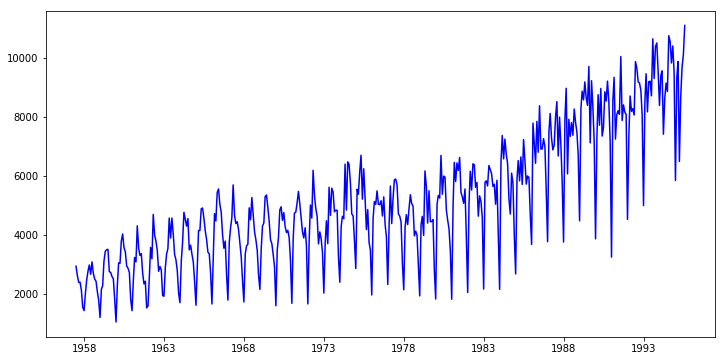

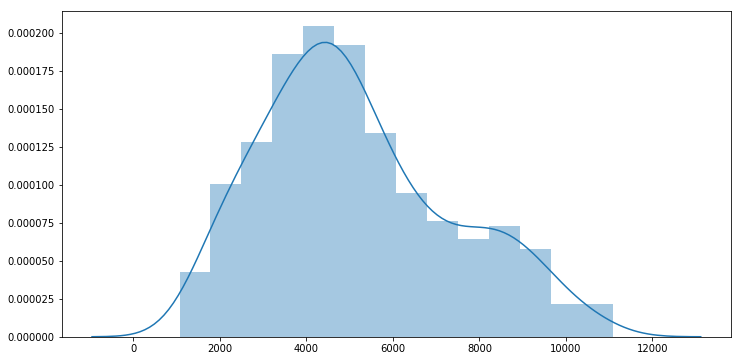

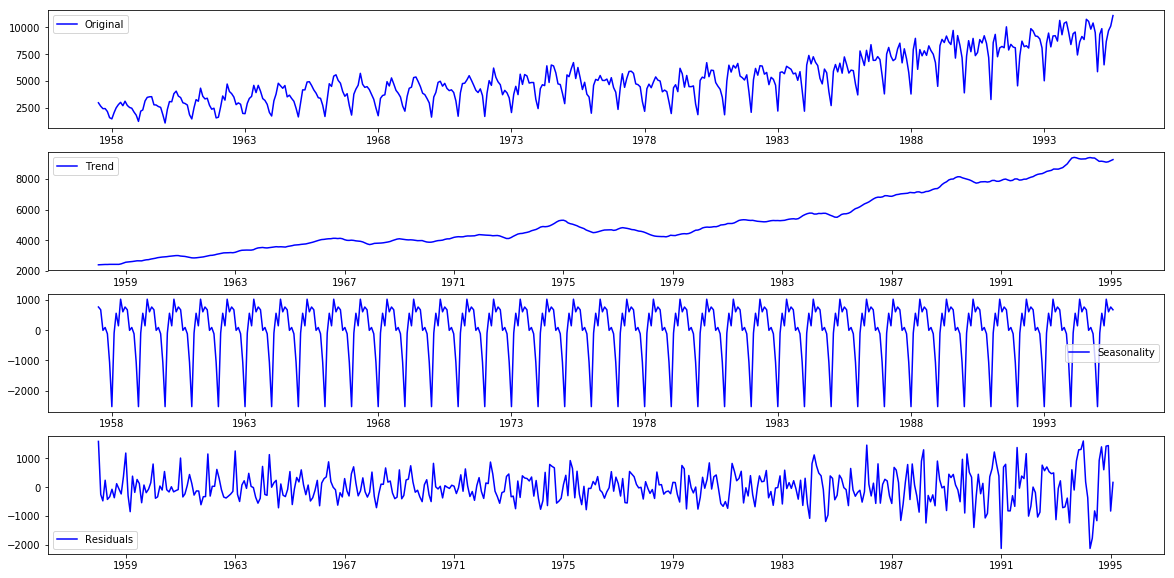

In [11]:
#Chocolate EDA
plt_(df_chocolate)
density_plt_(df_chocolate)
decomp_plt_(df_chocolate)

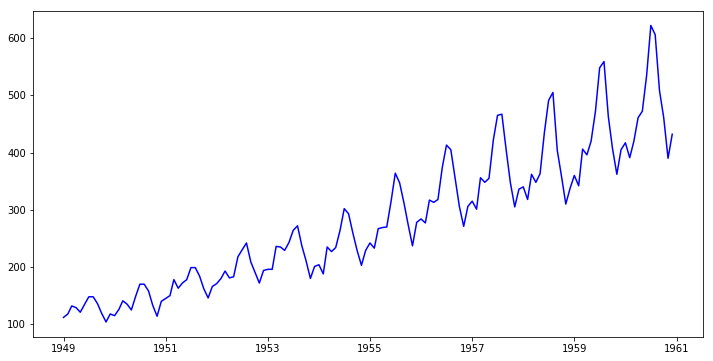

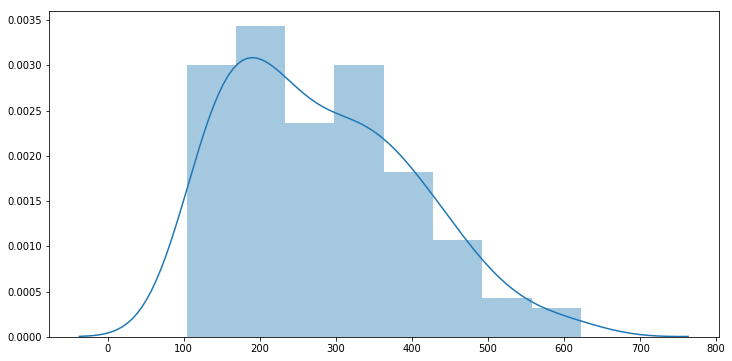

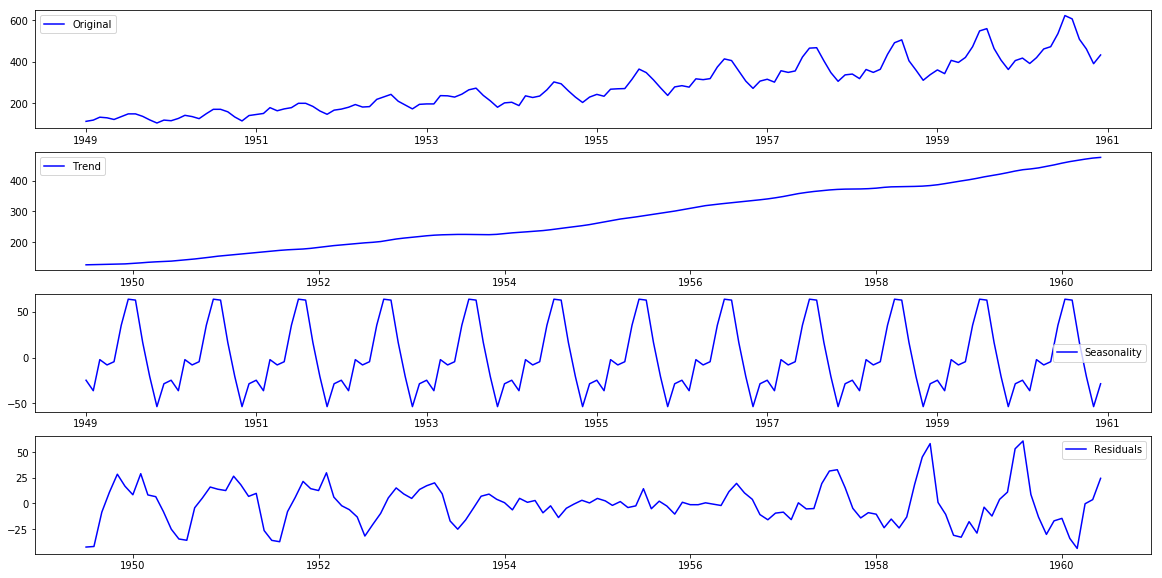

In [12]:
#Air Passengers EDA
plt_(df_air)
density_plt_(df_air)
decomp_plt_(df_air)

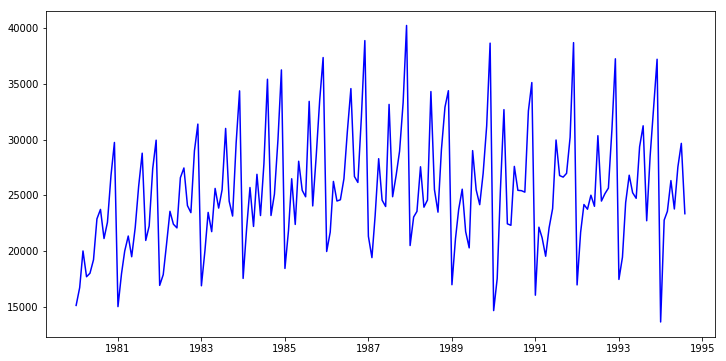

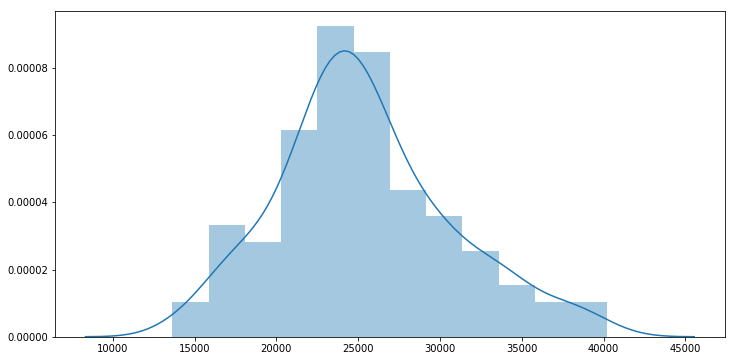

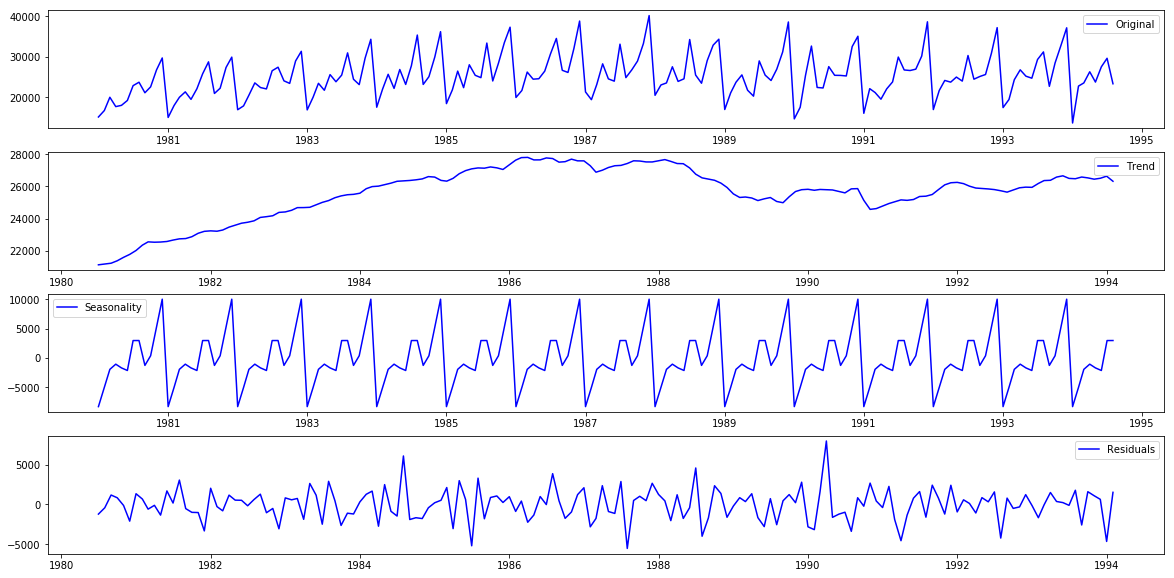

In [13]:
#Wine EDA
plt_(df_wine)
density_plt_(df_wine)
decomp_plt_(df_wine)

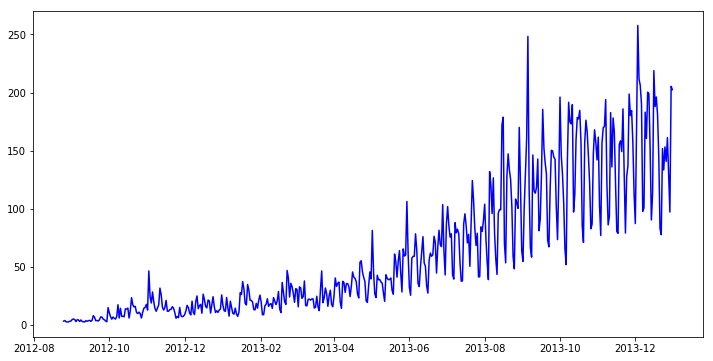

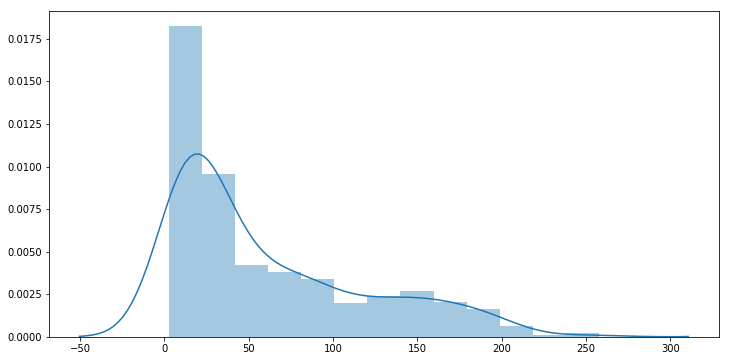

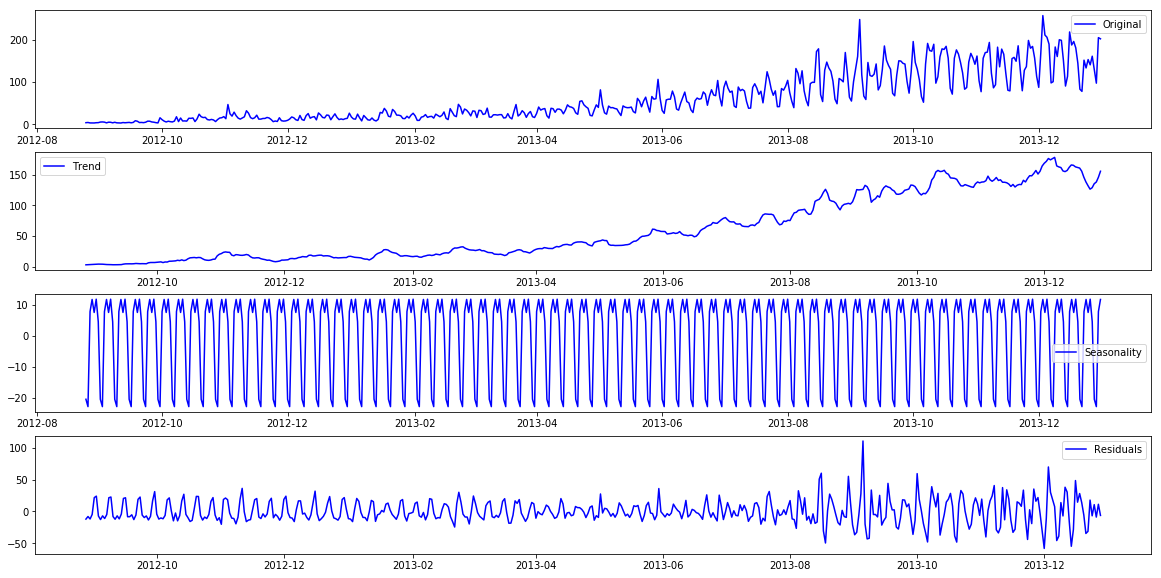

In [14]:
#JetRail EDA
plt_(df_jet)
density_plt_(df_jet)
decomp_plt_(df_jet)

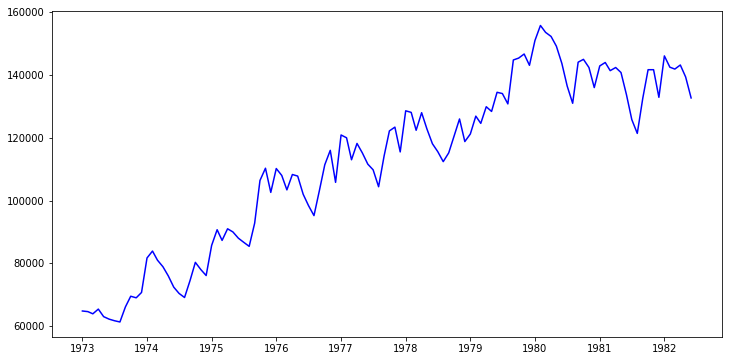

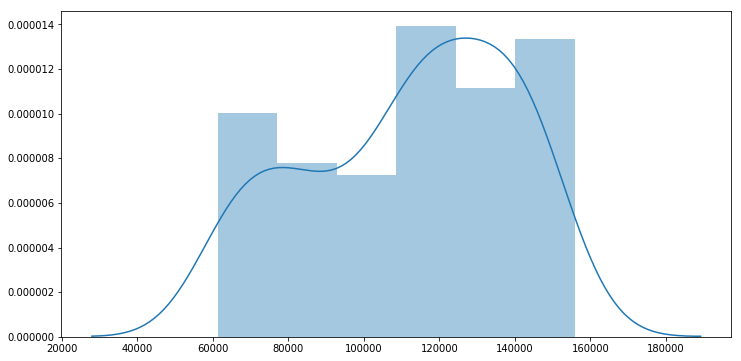

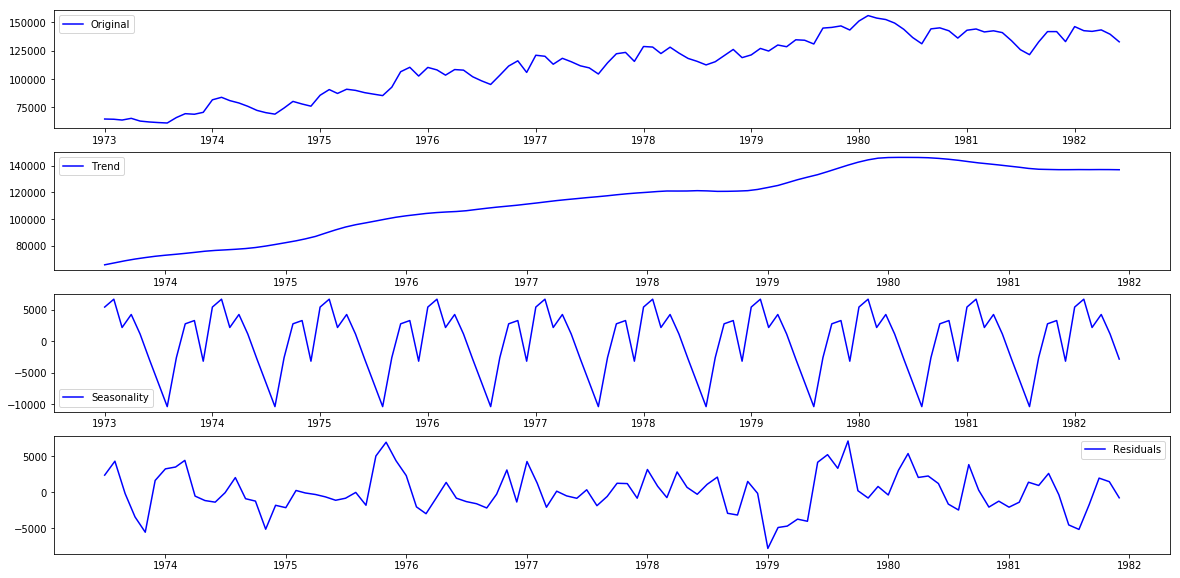

In [15]:
#Portland EDA
plt_(df_portland)
density_plt_(df_portland)
decomp_plt_(df_portland)

# Step 3 - Stationary Check

In [62]:
#Checking if the data is stationary or not
def stationarity_test(dataset):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(dataset, autolag = 'AIC')
    dftest_output = pd.Series(dftest[0:2], index = ['Test statistic', 'p_value'])
#    for keys, values in dftest[4].items():
#        dftest_output['critical value (%s)' %keys] = values 
    return dftest_output

In [63]:
stationarity_test(df_chocolate[df_chocolate.columns[0]])

Results of Dickey-Fuller Test:


Test statistic    0.923529
p_value           0.993390
dtype: float64

In [64]:
stationarity_test(df_air[df_air.columns[0]])

Results of Dickey-Fuller Test:


Test statistic    0.815369
p_value           0.991880
dtype: float64

In [65]:
stationarity_test(df_wine[df_wine.columns[0]])

Results of Dickey-Fuller Test:


Test statistic   -2.852468
p_value           0.051161
dtype: float64

In [66]:
stationarity_test(df_jet[df_jet.columns[0]])

Results of Dickey-Fuller Test:


Test statistic    0.165688
p_value           0.970270
dtype: float64

In [69]:
stationarity_test(df_portland[df_portland.columns[0]])

Results of Dickey-Fuller Test:


Test statistic   -1.536597
p_value           0.515336
dtype: float64

# Step 4 - Make Stationary

Results of Dickey-Fuller Test:
Test statistic   -0.629981
p_value           0.864063
dtype: float64
Results of Dickey-Fuller Test:
Test statistic   -8.402331e+00
p_value           2.214173e-13
dtype: float64


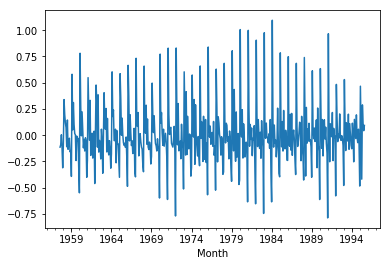

In [75]:
# Transform log
print(stationarity_test(np.log(df_chocolate[df_chocolate.columns[0]])))
# Not working

# Differencing: taking the differece with a particular time lag
df_chocolate_diff = np.log(df_chocolate[df_chocolate.columns[0]]).diff().dropna()
print(stationarity_test(df_chocolate_diff))
df_chocolate_diff.plot()

Results of Dickey-Fuller Test:
Test statistic   -3.162908
p_value           0.022235
dtype: float64
Results of Dickey-Fuller Test:
Test statistic   -3.601262
p_value           0.005737
dtype: float64
Results of Dickey-Fuller Test:
Test statistic   -2.717131
p_value           0.071121
dtype: float64
Results of Dickey-Fuller Test:
Test statistic   -4.443325
p_value           0.000249
dtype: float64


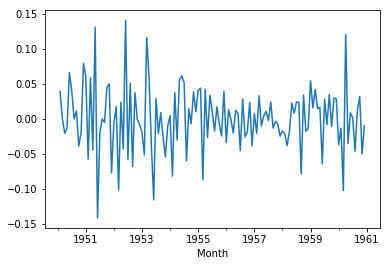

In [79]:
# Transforming with log
logair = np.log(df_air[df_air.columns[0]])
# Not working

# Differentiating with rolling average
movingavg = pd.rolling_mean(logair,12) # Rolling moving average
df_air_diff = logair - movingavg
df_air_diff.dropna(inplace= True)
print(stationarity_test(df_air_diff))
# Not too bad

# Differentiating with exponentially weighted moving average
expavg = pd.ewma(logair,halflife=12) # Exponentially weighted moving average
df_air_diff = logair - expavg
df_air_diff.dropna(inplace= True)
print(stationarity_test(df_air_diff))
# Very good

# Differentiating Log with first order of difference
df_air_diff = np.log(df_air[df_air.columns[0]]).diff().dropna()
print(stationarity_test(df_air_diff))
# Not too bad

# Differentiating Log with second order of difference
df_air_diff = np.log(df_air[df_air.columns[0]]).diff().diff(12).dropna()
print(stationarity_test(df_air_diff))
df_air_diff.plot()
# Best model

Results of Dickey-Fuller Test:
Test statistic   -23.414234
p_value            0.000000
dtype: float64


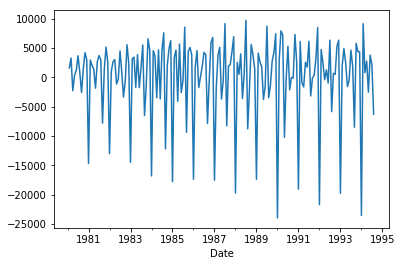

In [84]:
df_wine_diff = df_wine[df_wine.columns[0]].diff().dropna()
print(stationarity_test(df_wine_diff))
df_wine_diff.plot()

Results of Dickey-Fuller Test:
Test statistic   -7.683676e+00
p_value           1.480931e-11
dtype: float64


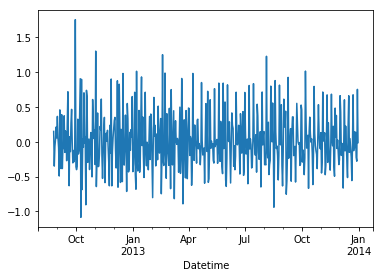

In [85]:
df_jet_diff = np.log(df_jet[df_jet.columns[0]]).diff().dropna()
print(stationarity_test(df_jet_diff))
df_jet_diff.plot()

Results of Dickey-Fuller Test:
Test statistic   -9.258520e+00
p_value           1.427874e-15
dtype: float64


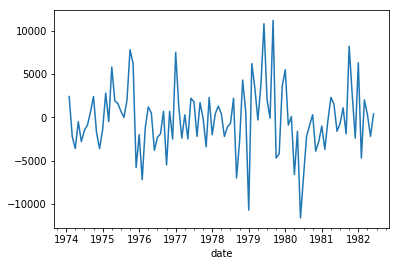

In [88]:
df_portland_diff = df_portland[df_portland.columns[0]].diff().diff(12).dropna()
print(stationarity_test(df_portland_diff))
df_portland_diff.plot()

# Bonus - Reverse Transformation (log) and Differentiation (diff) for Forecasted Values

In [99]:
# Reverse np.log
df = df_air
df['Transformation'] = np.log(df[df.columns[0]])
df['Reverse'] = round(np.exp(df['Transformation']),0)
df['Check'] = df[df.columns[0]] - df['Reverse']
df.head()

,Passengers,Transformation,Reverse,Check
Month,,,,
1949-01-01,112,4.718499,112.0,0.0
1949-02-01,118,4.770685,118.0,0.0
1949-03-01,132,4.882802,132.0,0.0
1949-04-01,129,4.859812,129.0,0.0
1949-05-01,121,4.795791,121.0,0.0


In [112]:
# Reverse .diff()
df2 = df_air
df2['Transformation'] = df2[df2.columns[0]].diff()
df2['Reverse'] = df2['Transformation'].cumsum() + df2[df2.columns[0]].iloc[0]
df2['Check'] = df2[df2.columns[0]] - df2['Reverse']
df2.head()

,Passengers,Transformation,Reverse,Check
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,118.0,0.0
1949-03-01,132,14.0,132.0,0.0
1949-04-01,129,-3.0,129.0,0.0
1949-05-01,121,-8.0,121.0,0.0


In [122]:
# Reverse Log + diff()
df3 = df_air
df3['Transformation'] = np.log(df3[df3.columns[0]]).diff()
df3['Reverse'] = np.exp(np.log(df3[df3.columns[0]].shift()) + df3['Transformation'])
df3['Check'] = round(df3[df3.columns[0]] - df3['Reverse'],2)
df3.head()

,Passengers,Transformation,Reverse,Check
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,0.052186,118.0,-0.0
1949-03-01,132,0.112117,132.0,0.0
1949-04-01,129,-0.022990,129.0,0.0
1949-05-01,121,-0.064022,121.0,-0.0


In [148]:
# Double diff()
# df4 = df_air
# df4['Transformation1'] = df4[df4.columns[0]].diff()
# df4['Transformation2'] = df4['Transformation1'].diff(12)
# df4['Reverse'] = -df4['Transformation2'].cumsum() + df4['Transformation1'].cumsum() + df4[df4.columns[0]].iloc[0]
# df4.head(20)

,Passengers,Transformation,Transformation1,Transformation2,Reverse
Month,,,,,
1949-01-01,112,NaN,NaN,NaN,NaN
1949-02-01,118,NaN,6.0,NaN,NaN
1949-03-01,132,NaN,14.0,NaN,NaN
1949-04-01,129,NaN,-3.0,NaN,NaN
1949-05-01,121,NaN,-8.0,NaN,NaN
1949-06-01,135,NaN,14.0,NaN,NaN
1949-07-01,148,NaN,13.0,NaN,NaN
1949-08-01,148,NaN,0.0,NaN,NaN
1949-09-01,136,NaN,-12.0,NaN,NaN


# Bonus - Multiple Train Test Splits for BackTesting Time Series

Observations: 48
Training Observations: 24
Testing Observations: 24
Observations: 72
Training Observations: 48
Testing Observations: 24
Observations: 96
Training Observations: 72
Testing Observations: 24
Observations: 120
Training Observations: 96
Testing Observations: 24
Observations: 144
Training Observations: 120
Testing Observations: 24


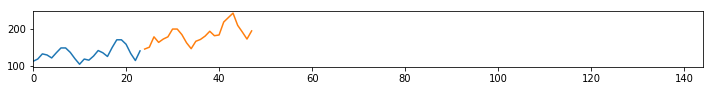

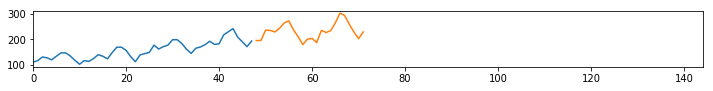

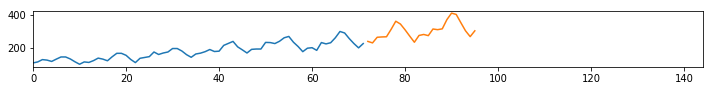

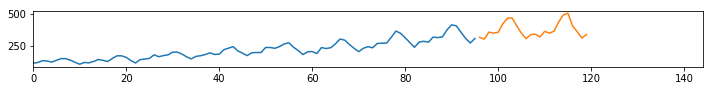

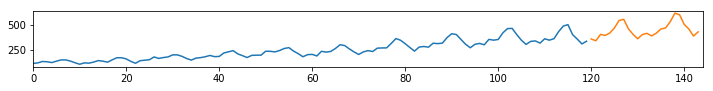

In [60]:
from pandas import Series
from sklearn.model_selection import TimeSeriesSplit
from matplotlib import pyplot
series = df_air
X = series.values
n_splits=5
splits = TimeSeriesSplit(n_splits)
plt.figure(1)
index = 1
for train_index, test_index in splits.split(X):
        train = X[train_index]
        test = X[test_index]
        plt.figure(figsize=(12,6))
        print('Observations: %d' % (len(train) + len(test)))
        print('Training Observations: %d' % (len(train)))
        print('Testing Observations: %d' % (len(test)))
        plt.subplot(n_splits,1,index)
        plt.plot(train)
        plt.xlim(0, len(X))
        plt.plot([None for i in train] + [x for x in test])
        index += 1
plt.show()

# Bonus - Separate Residual and Stationary Test

Results of Dickey-Fuller Test:
Test statistic   -5.298428
p_value           0.000006
dtype: float64
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1949-07-01 to 1960-06-01
Data columns (total 1 columns):
Passengers    132 non-null float64
dtypes: float64(1)
memory usage: 2.1 KB


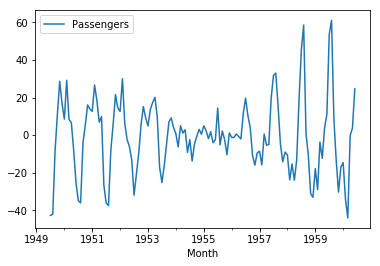

In [75]:
#Using Residual
decomposition = seasonal_decompose(df_air)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
residual.dropna(inplace=True)
residual.plot()
residual.info()
print(stationarity_test(residual[residual.columns[0]]))